In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
df=pd.read_csv("baseball.csv")
df.head(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


Here we can see in the dataset the columns are having short forms, so for easy understanding lets put the actual names in the columns.

In [3]:
df.columns=(['wins','Runs','At bat','Hit','2B','3B','Home Runs','Base on Balls','Strike_Out','Stolen_Base','Run_Average',
             'Earned_Run','Earned_Run_Avg','Complete_game','Shut Out','Save','Errors'])
df.head()

,wins,Runs,At bat,Hit,2B,3B,Home Runs,Base on Balls,Strike_Out,Stolen_Base,Run_Average,Earned_Run,Earned_Run_Avg,Complete_game,Shut Out,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
print("There are total",df.shape[0],"rows in the dataset.")
print("And the no. of columns in the dataset is",df.shape[1])

There are total 30 rows in the dataset.
And the no. of columns in the dataset is 17


Here is the modified dataset with a detailed data.

In [5]:
#checking for null values
df.isnull().sum()

wins              0
Runs              0
At bat            0
Hit               0
2B                0
3B                0
Home Runs         0
Base on Balls     0
Strike_Out        0
Stolen_Base       0
Run_Average       0
Earned_Run        0
Earned_Run_Avg    0
Complete_game     0
Shut Out          0
Save              0
Errors            0
dtype: int64

We can see there are no null values in the dataset. Lets visualize it using a heatmap.

<AxesSubplot:>

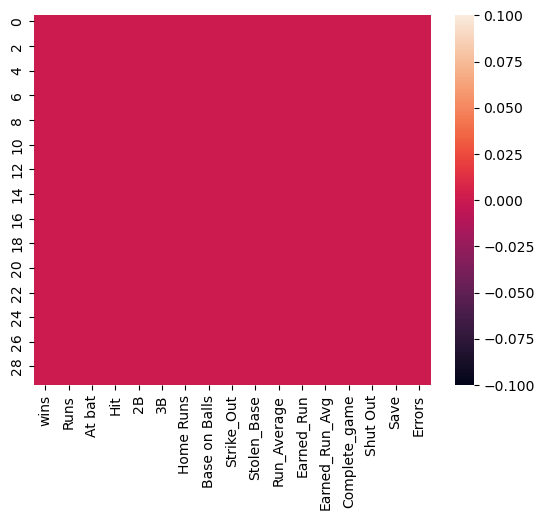

In [6]:
sns.heatmap(df.isnull())

Here it is only a single colour which means there are no null values present in the dataset.

In [7]:
df.duplicated().sum()

0

There are no duplicate values

# Description

In [8]:
df.describe()

,wins,Runs,At bat,Hit,2B,3B,Home Runs,Base on Balls,Strike_Out,Stolen_Base,Run_Average,Earned_Run,Earned_Run_Avg,Complete_game,Shut Out,Save,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Visualization

# Uni-Variate Analysis

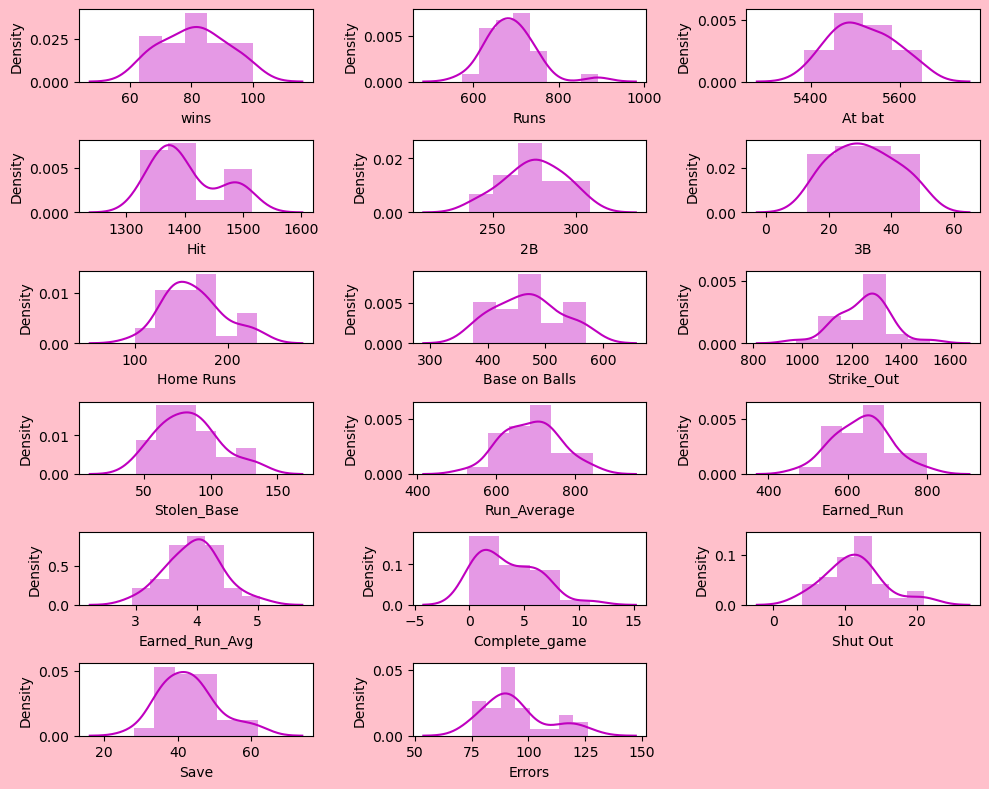

In [9]:
plt.figure(figsize=(10,8),facecolor='pink')
p=1
for i in df.columns:
    if p<=17:
        plt.subplot(6,3,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=10)
    p+=1
plt.tight_layout()

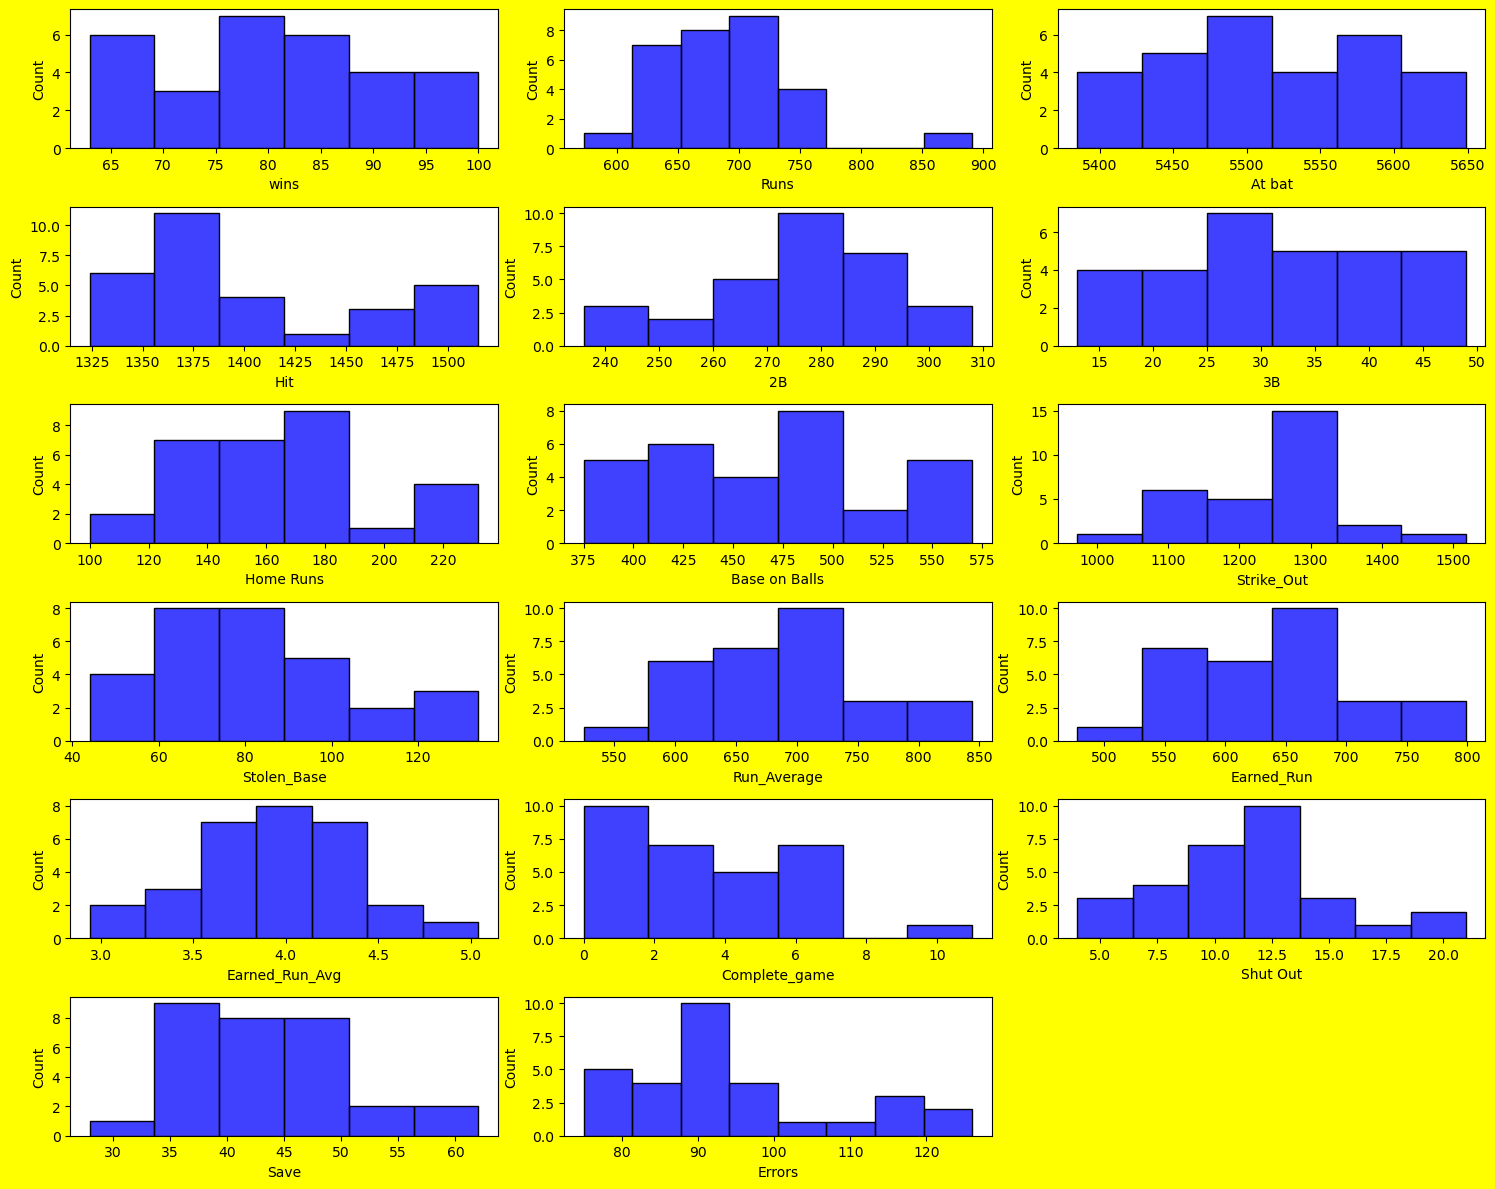

In [10]:
plt.figure(figsize=(15,12),facecolor='yellow')
p=1
for i in df.columns:
    if p<=17:
        plt.subplot(6,3,p)
        sns.histplot(df[i],color='blue')
        plt.xlabel(i,fontsize=10)
    p+=1
plt.tight_layout()

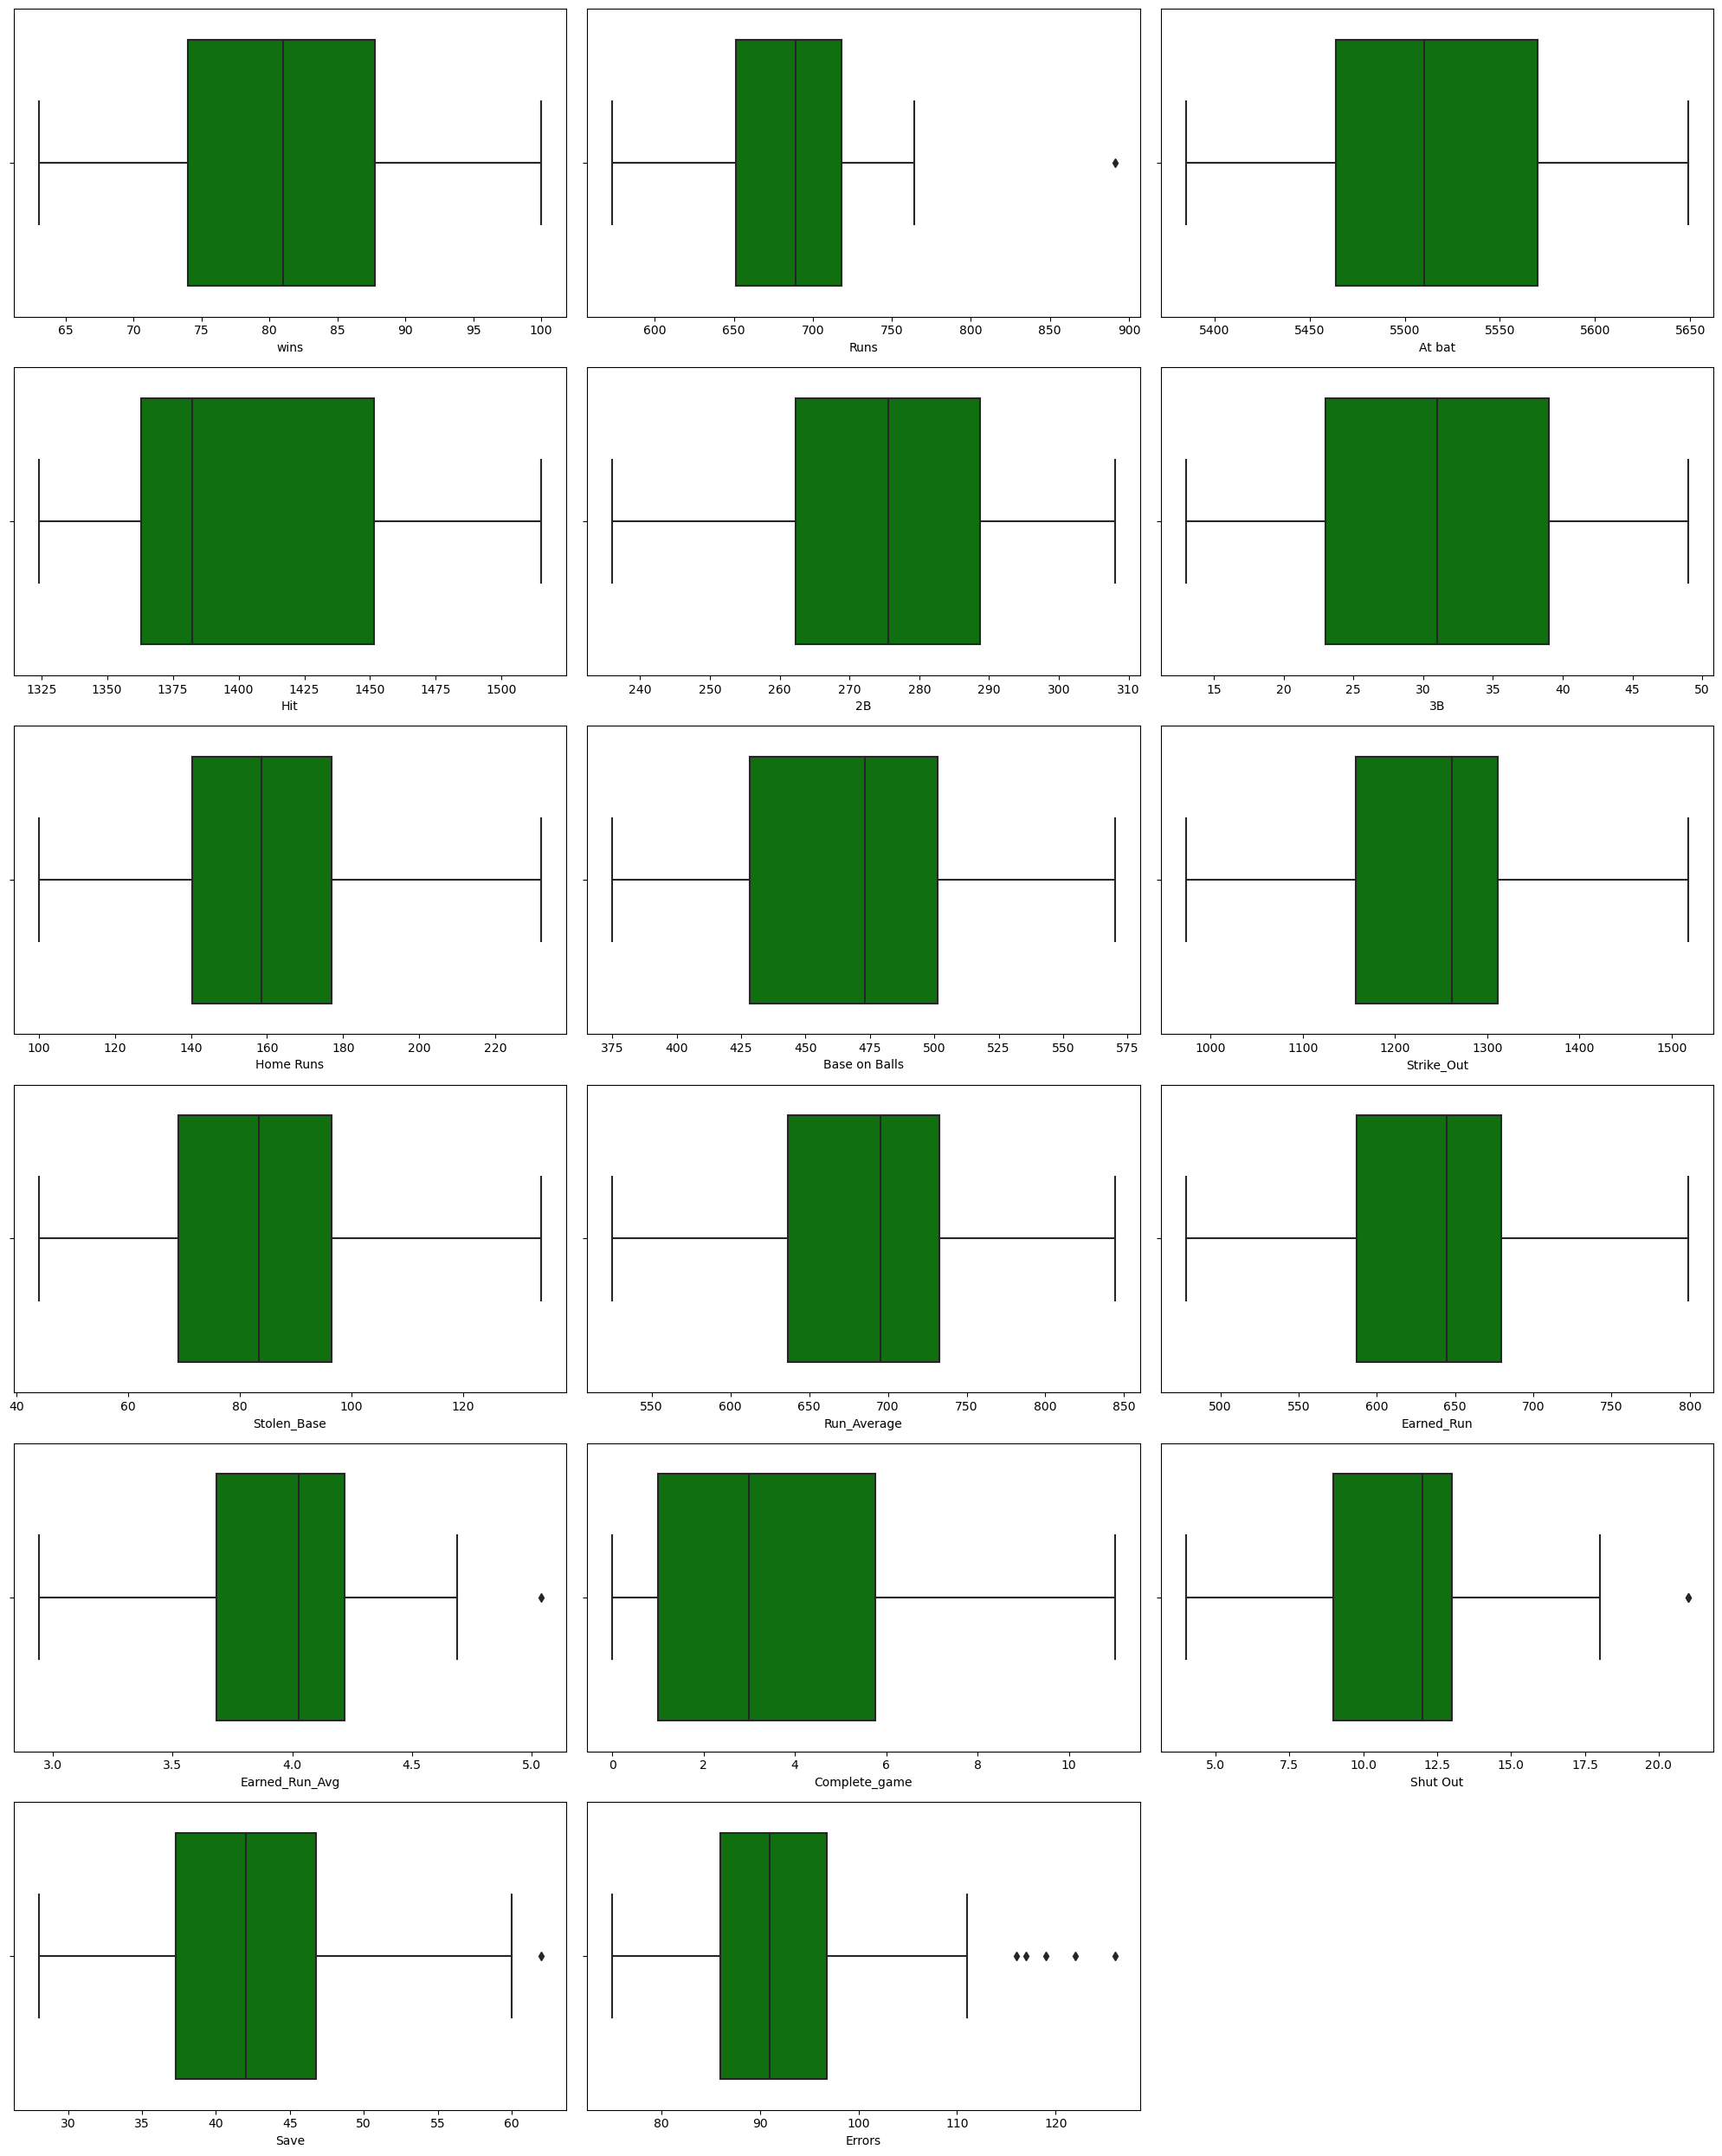

In [11]:
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=17:
        plt.subplot(6,3,p)
        sns.boxplot(df[i],color='green')
        plt.xlabel(i,fontsize=10)
    p+=1
plt.tight_layout()

# Bi-Variate Analysis

In [12]:
df.columns

Index(['wins', 'Runs', 'At bat', 'Hit', '2B', '3B', 'Home Runs',
       'Base on Balls', 'Strike_Out', 'Stolen_Base', 'Run_Average',
       'Earned_Run', 'Earned_Run_Avg', 'Complete_game', 'Shut Out', 'Save',
       'Errors'],
      dtype='object')

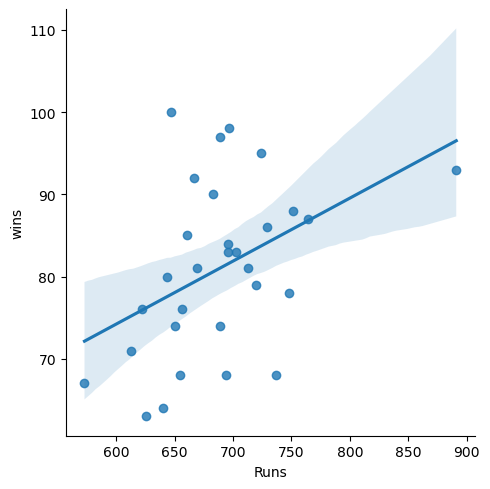

In [13]:
sns.lmplot(data=df,x='Runs',y='wins',palette='Set2_r')

<AxesSubplot:xlabel='Hit', ylabel='At bat'>

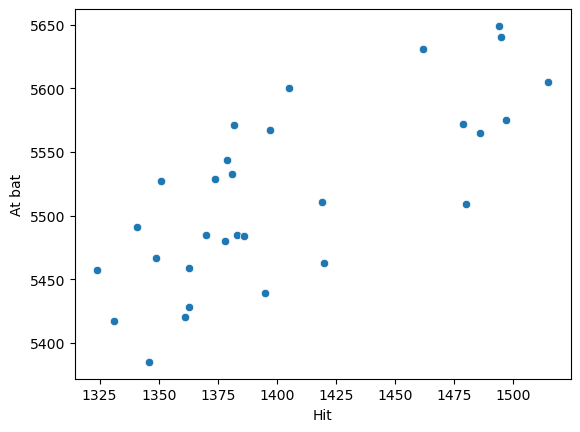

In [14]:
sns.scatterplot(data=df,x='Hit',y='At bat',palette='Dark2')

<AxesSubplot:xlabel='2B', ylabel='3B'>

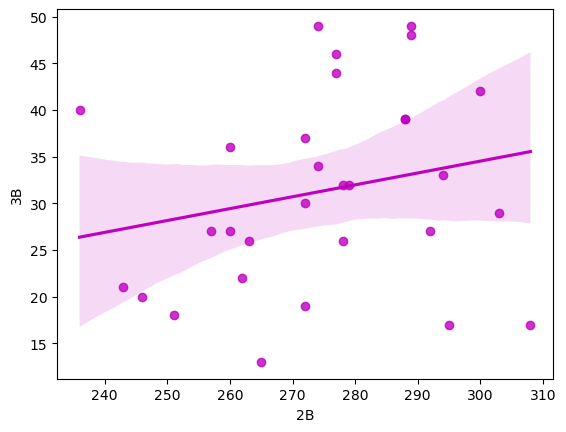

In [15]:
sns.regplot(data=df,x='2B',y='3B',color='m')

In [16]:
df.columns

Index(['wins', 'Runs', 'At bat', 'Hit', '2B', '3B', 'Home Runs',
       'Base on Balls', 'Strike_Out', 'Stolen_Base', 'Run_Average',
       'Earned_Run', 'Earned_Run_Avg', 'Complete_game', 'Shut Out', 'Save',
       'Errors'],
      dtype='object')

<AxesSubplot:xlabel='Home Runs', ylabel='Base on Balls'>

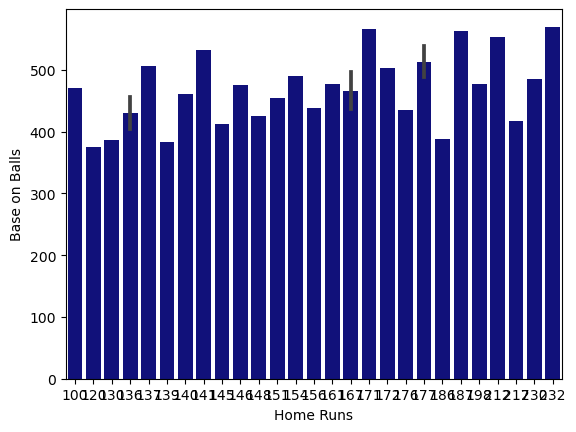

In [17]:
sns.barplot(data=df,x='Home Runs',y='Base on Balls',color='darkblue')

<AxesSubplot:xlabel='wins', ylabel='Strike_Out'>

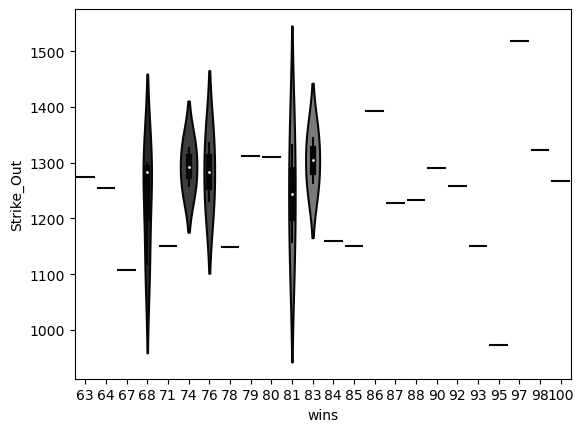

In [18]:
sns.violinplot(data=df,x='wins',y='Strike_Out',palette='gray')

<AxesSubplot:xlabel='wins', ylabel='Run_Average'>

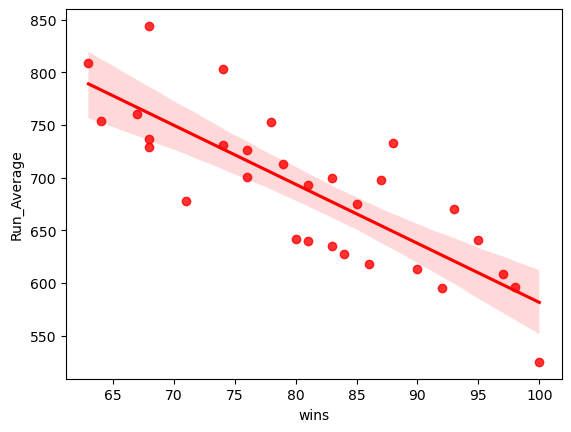

In [19]:
sns.regplot(data=df,y='Run_Average',x='wins',color='red')

<AxesSubplot:xlabel='Earned_Run', ylabel='Earned_Run_Avg'>

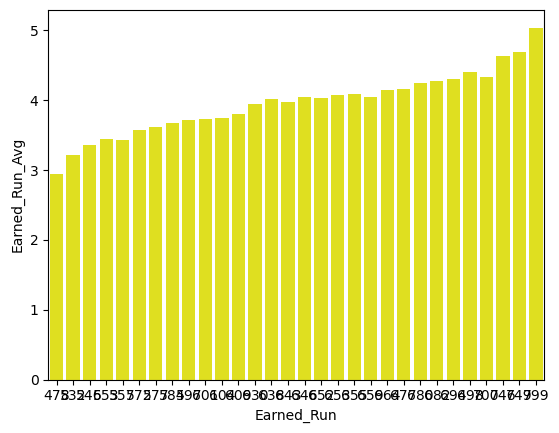

In [20]:
sns.barplot(data=df,x='Earned_Run',y='Earned_Run_Avg',color='yellow')

<AxesSubplot:xlabel='wins', ylabel='Complete_game'>

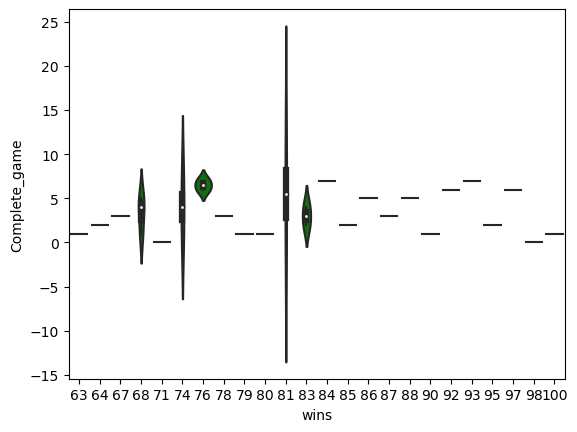

In [21]:
sns.violinplot(data=df,x='wins',y='Complete_game',color='green')

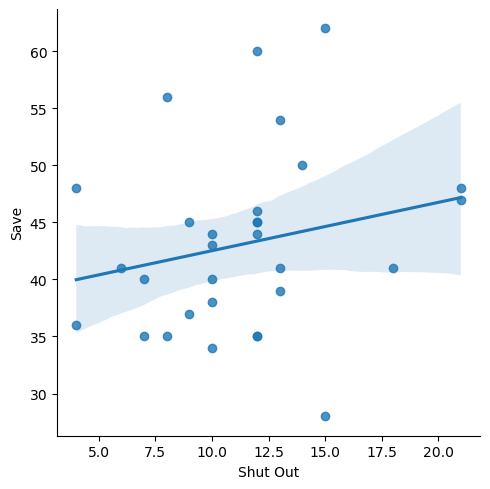

In [22]:
sns.lmplot(data=df,x='Shut Out',y='Save',palette='green')

<AxesSubplot:xlabel='wins', ylabel='Errors'>

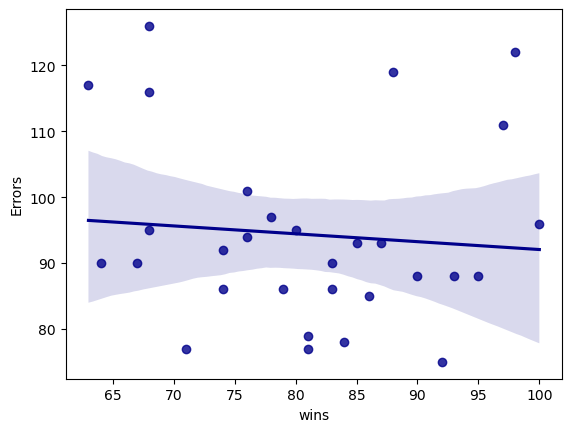

In [23]:
sns.regplot(data=df,x='wins',y='Errors',color='darkblue')

# Multi-Variate Analysis

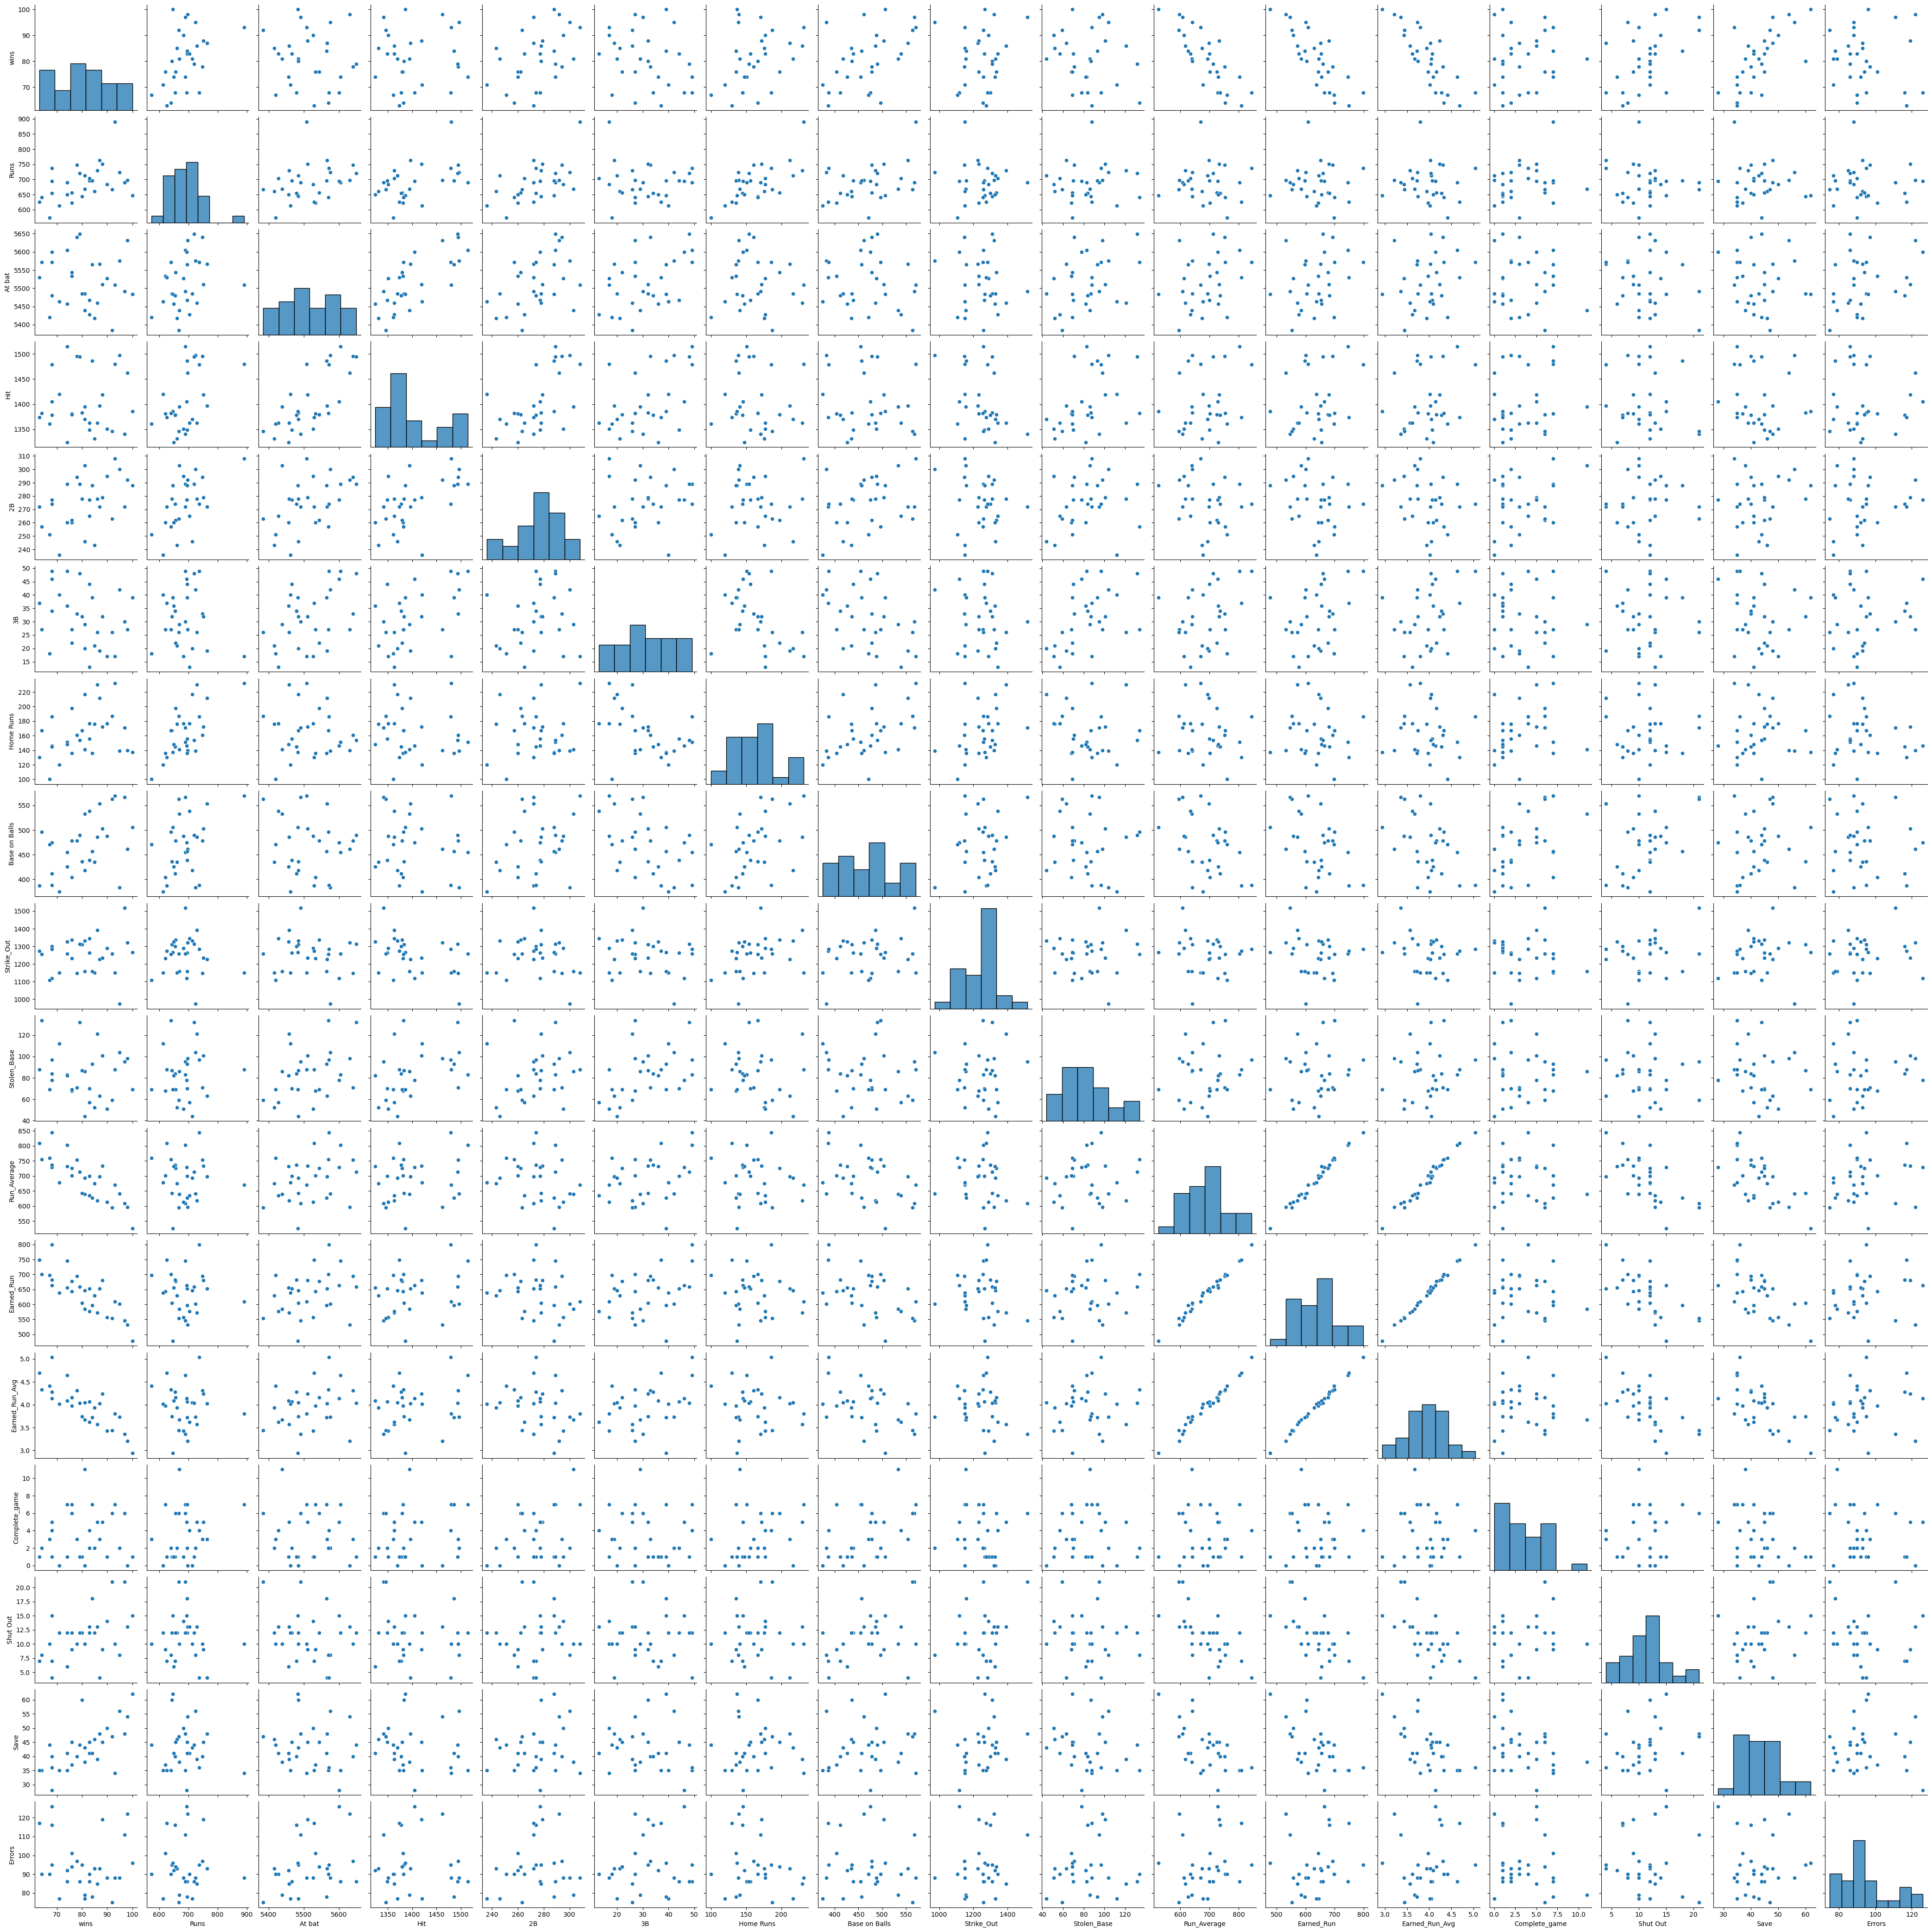

In [24]:
sns.pairplot(df)

# Outliers

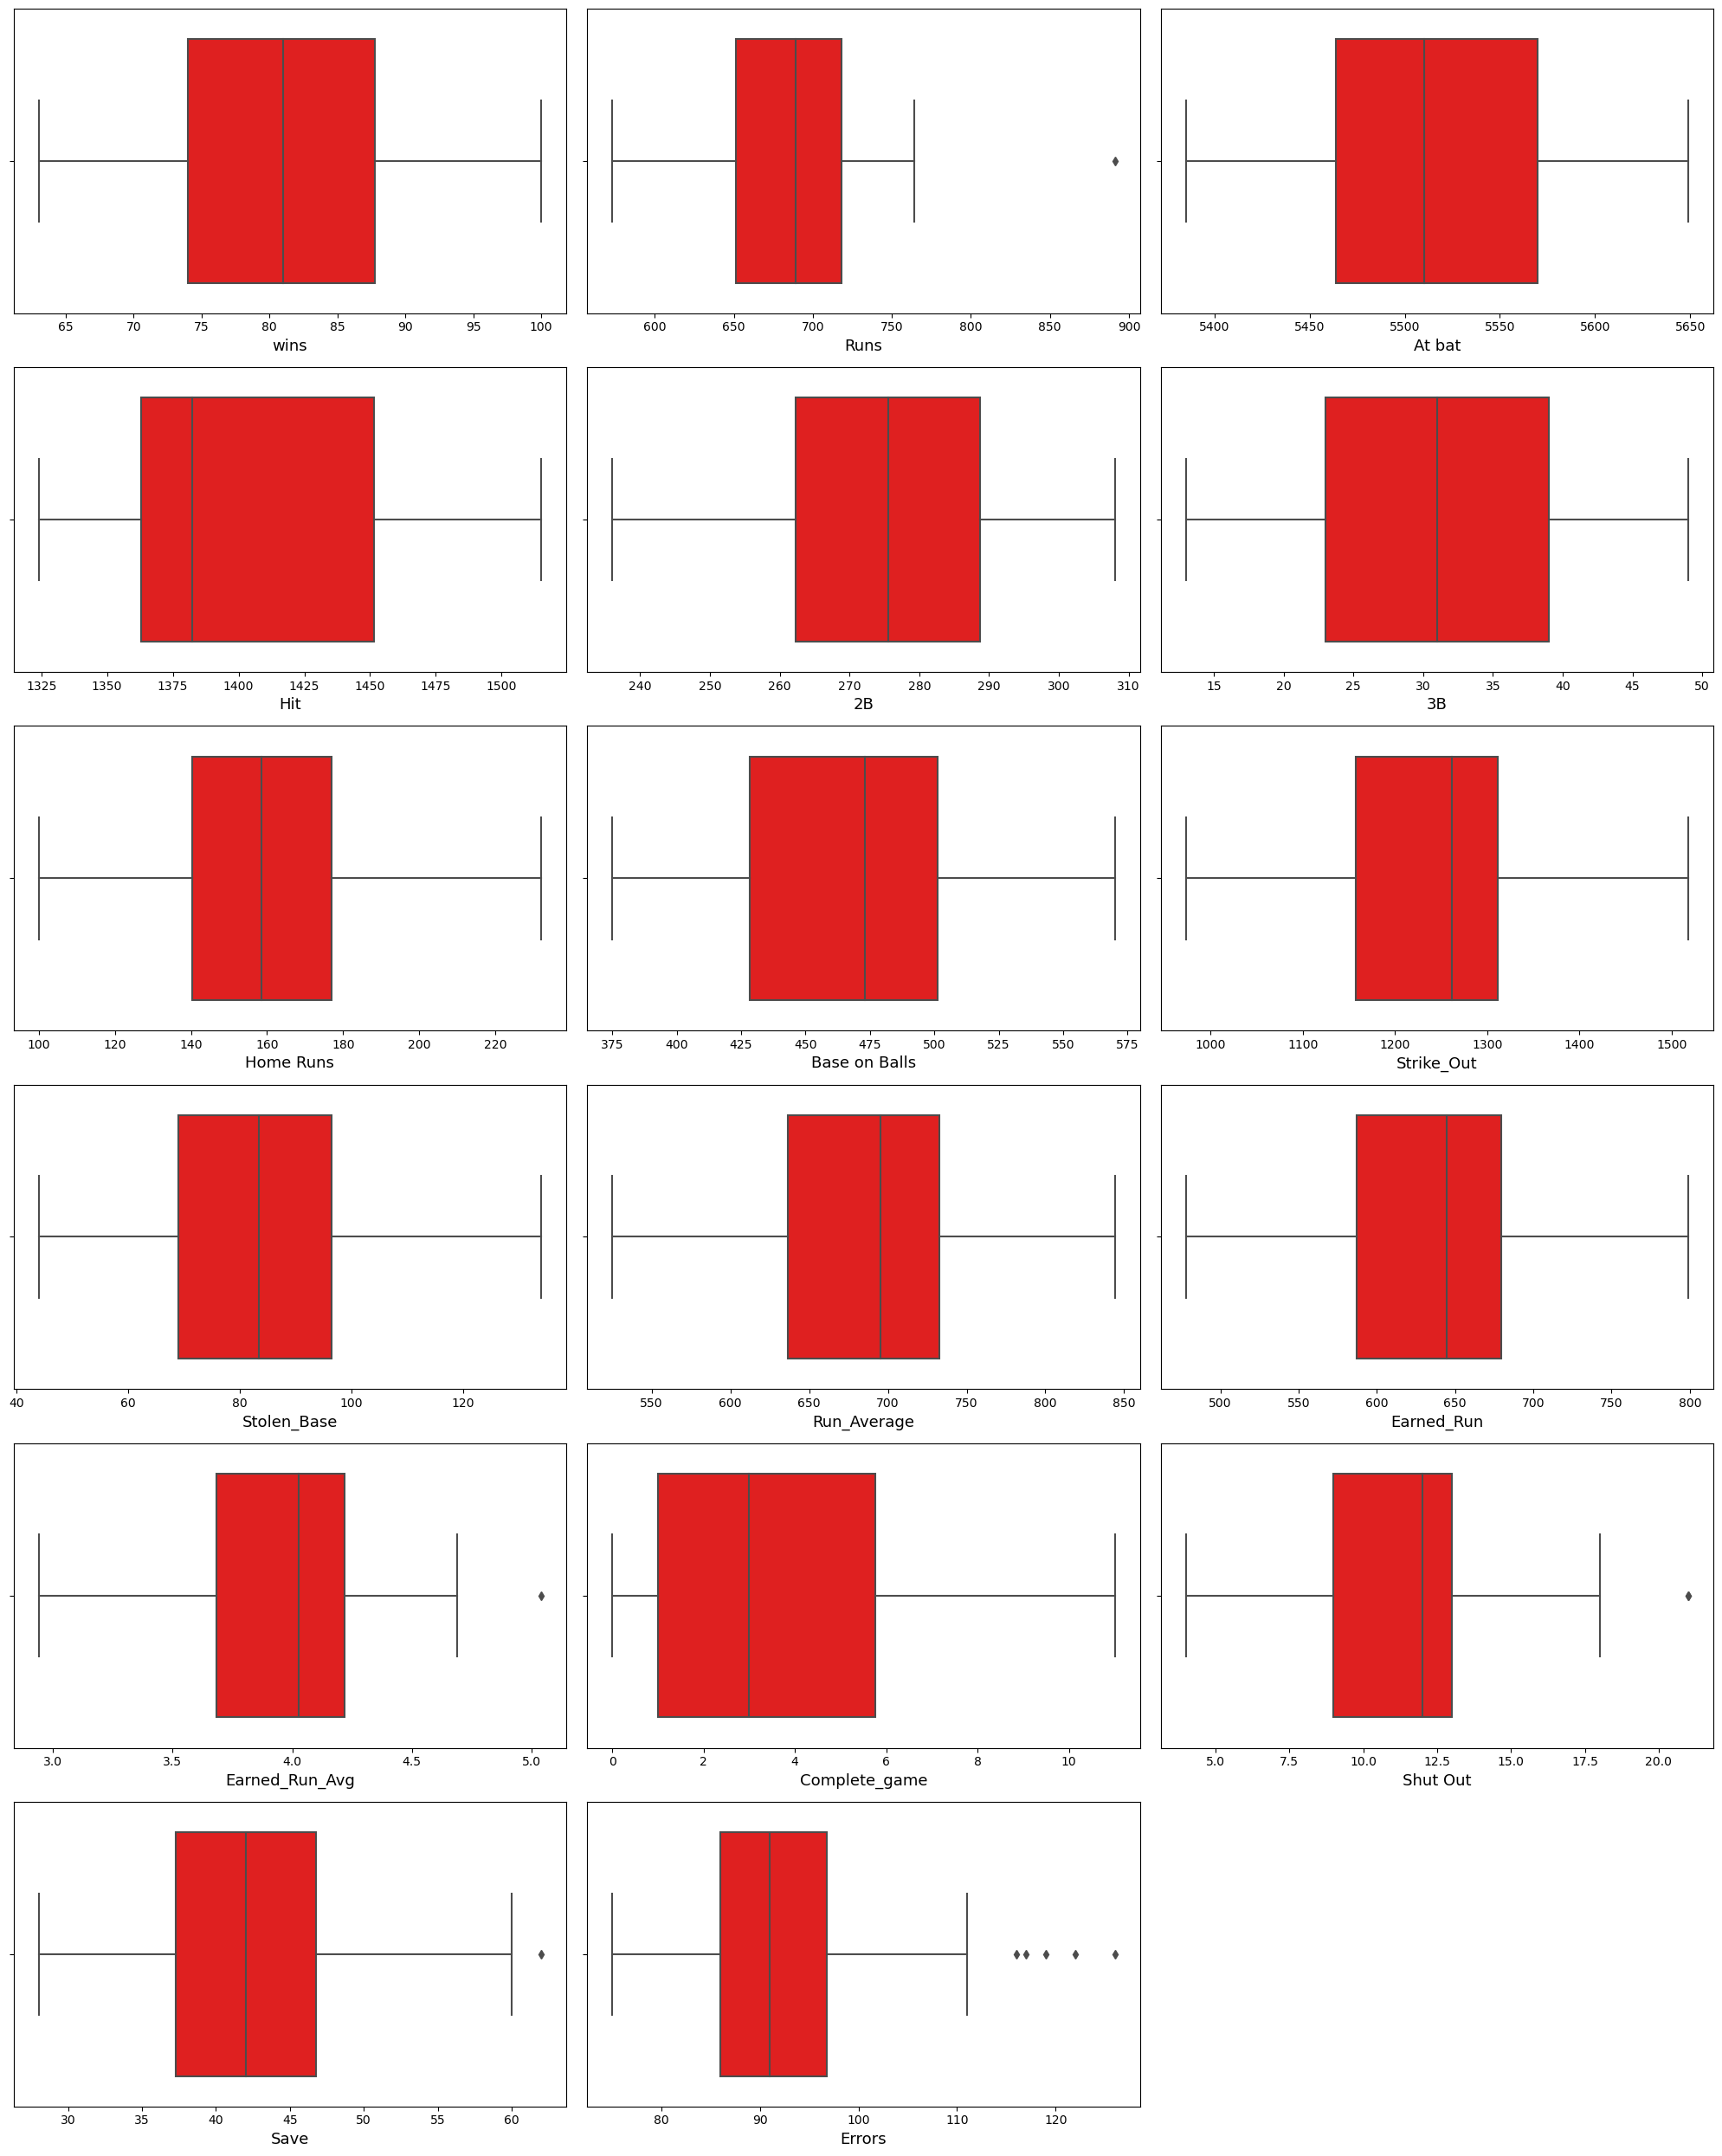

In [25]:
#Checking for outliers
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=17:
        plt.subplot(6,3,p)
        sns.boxplot(df[i],color='red')
        plt.xlabel(i,fontsize=13)
    p+=1
plt.tight_layout()

we can see there are very little outliers present in the dataset, lets remove them for correction prediction.

In [26]:
#Removing Outliers
outliers=df[['Runs','Shut Out','Save','Errors']]
from scipy.stats import zscore
z=np.abs(zscore(outliers))
z

,Runs,Shut Out,Save,Errors
0,0.619078,0.814629,1.671607,0.461470
1,0.134432,0.172800,0.249879,0.607197
2,0.332906,0.320914,0.654856,1.117242
3,1.146419,0.567771,0.784104,0.485758
4,0.013270,0.172800,1.042600,0.607197
5,3.509647,0.320914,1.171848,0.461470
6,1.311430,1.802057,0.637623,0.097152
7,0.428681,0.320914,0.008617,1.262970
8,0.765626,0.172800,2.188598,0.048576
9,1.034489,0.320914,0.396360,0.194303


In [27]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [29]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,wins,Runs,At bat,Hit,2B,3B,Home Runs,Base on Balls,Strike_Out,Stolen_Base,Run_Average,Earned_Run,Earned_Run_Avg,Complete_game,Shut Out,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [31]:
print(df_new.shape)
print(df.shape)

(29, 17)
(30, 17)


In [32]:
#Checking data loss after removing outliers
print("Data_Loss =",(df.shape[0]-df.shape[0])/df.shape[0]*100)

Data_Loss = 0.0


Here with the current dataloss we can easily proceed with the new dataset obtained after removing outliers.

In [33]:
df=df_new
df

,wins,Runs,At bat,Hit,2B,3B,Home Runs,Base on Balls,Strike_Out,Stolen_Base,Run_Average,Earned_Run,Earned_Run_Avg,Complete_game,Shut Out,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


# Checking Skewness

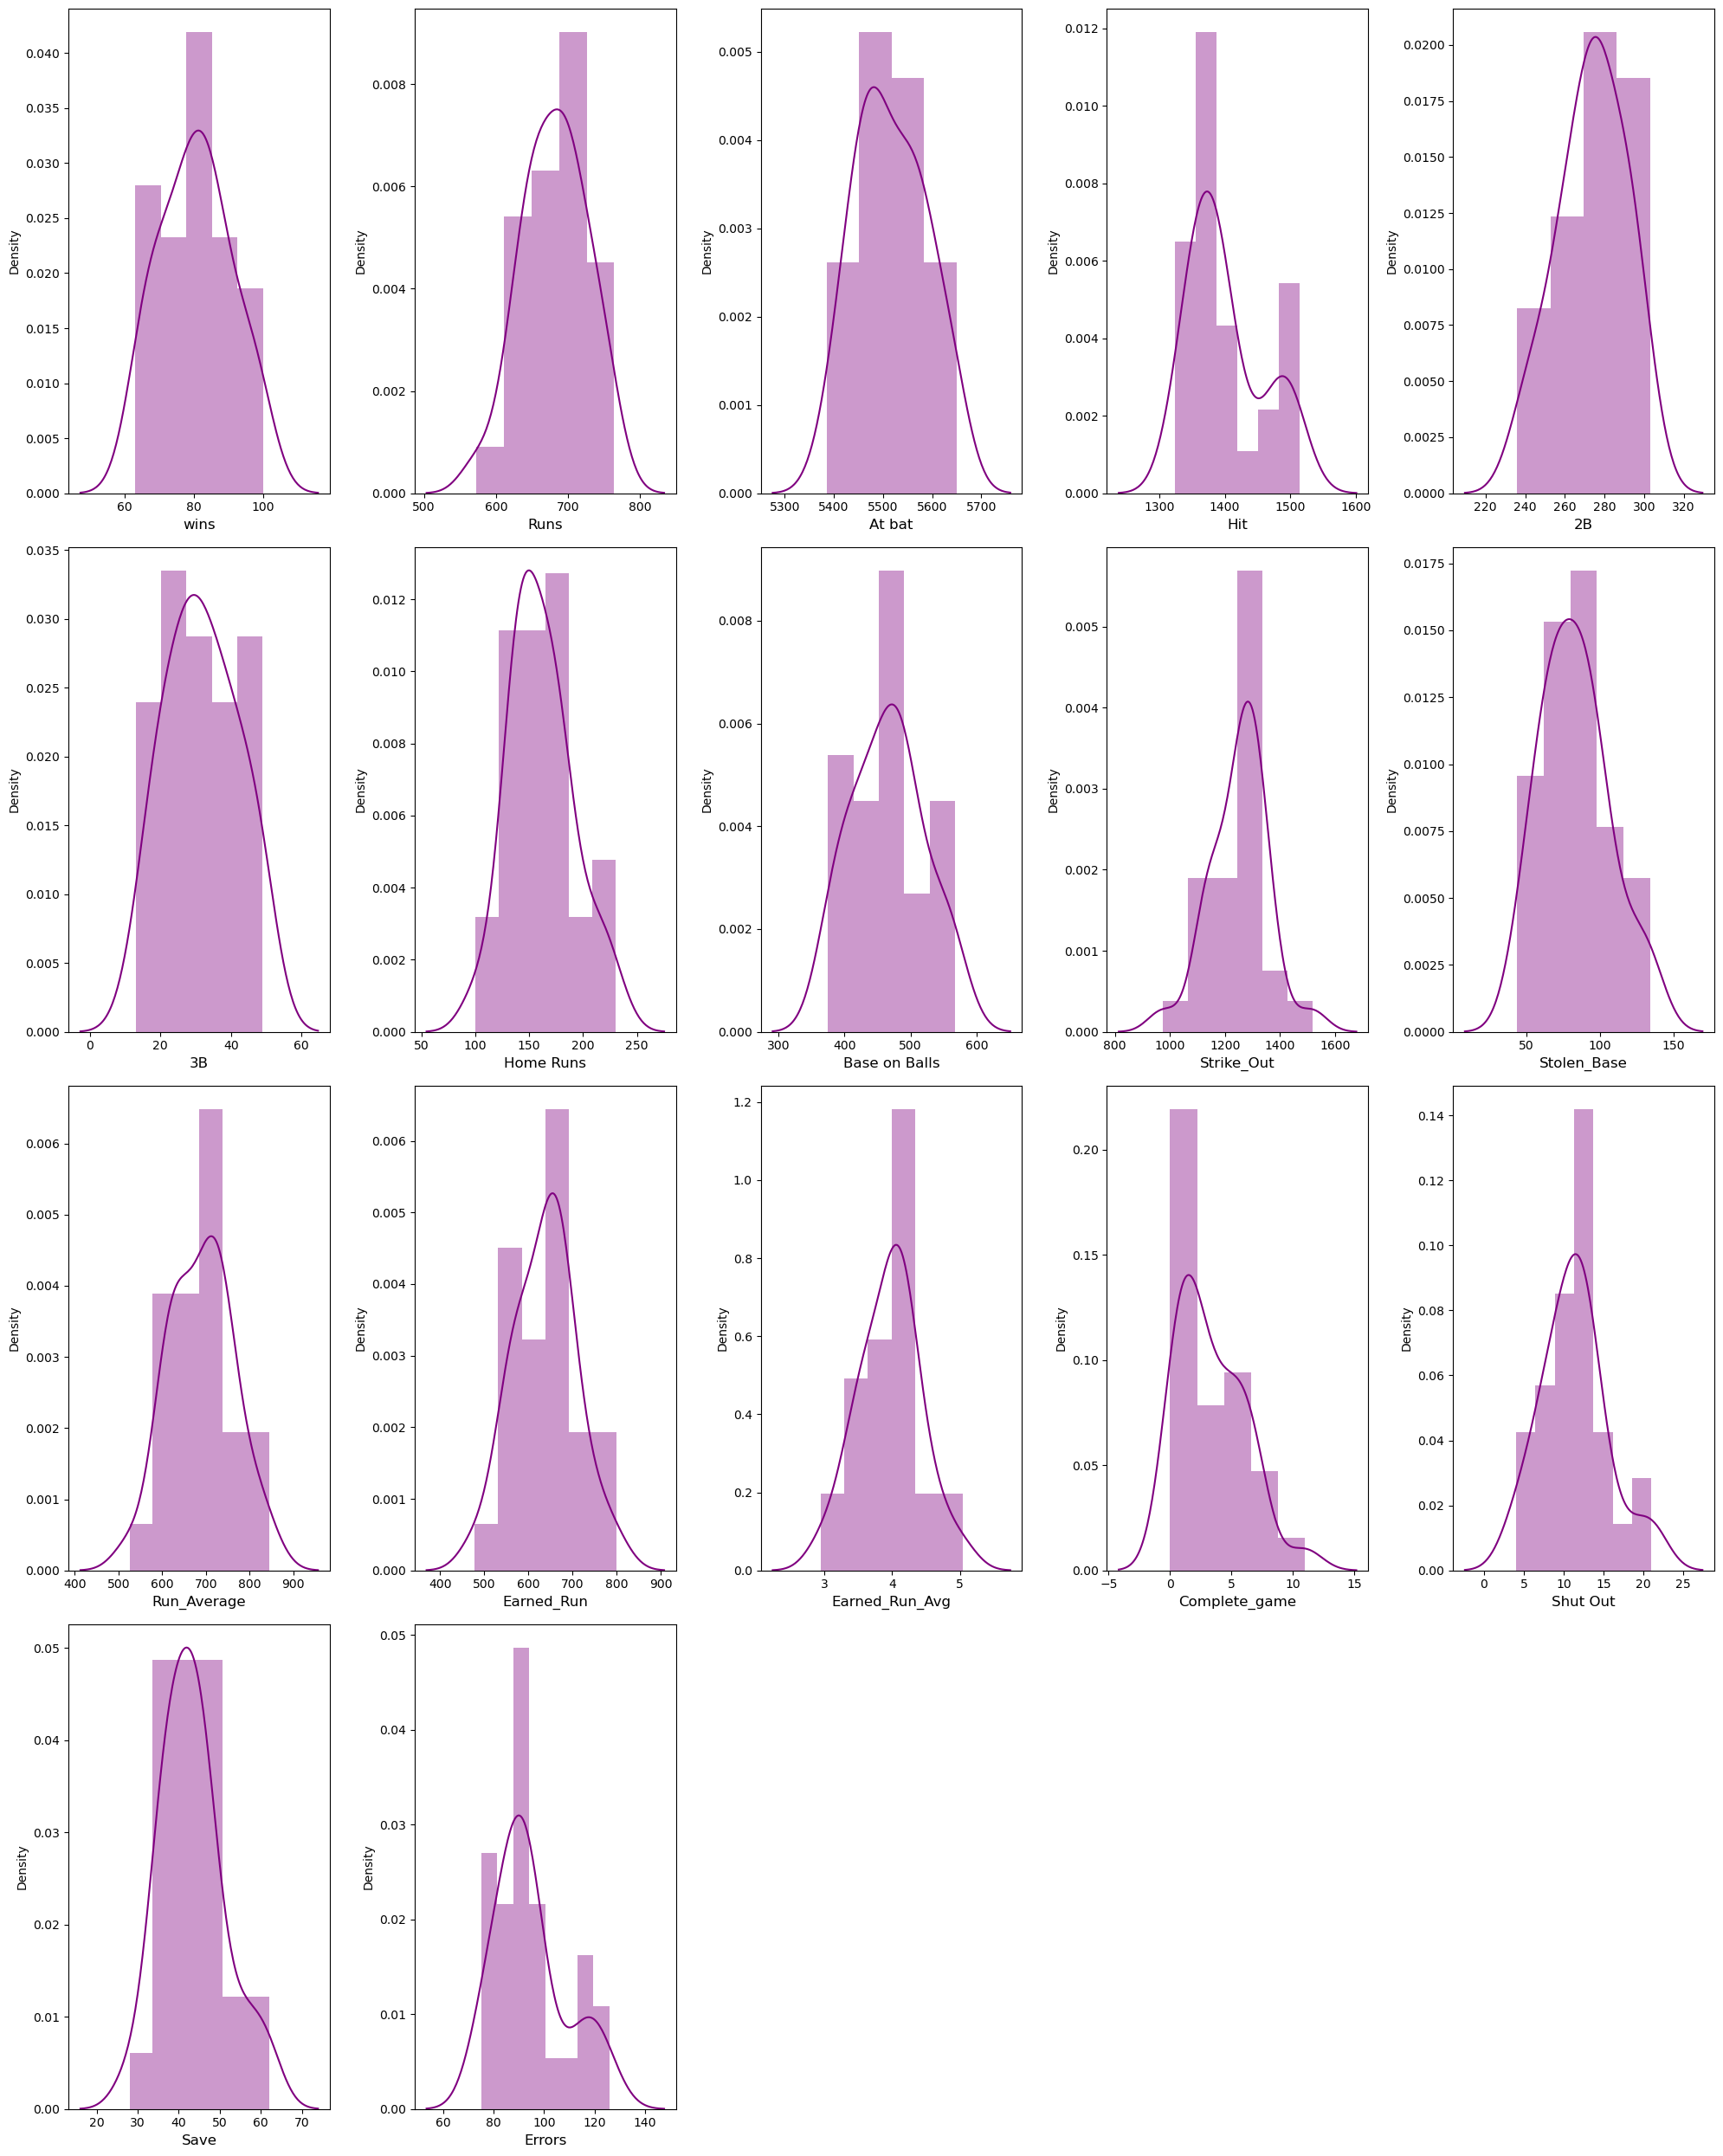

In [34]:
#Visulaizing skewness
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=17:
        plt.subplot(4,5,p)
        sns.distplot(df[i],color='purple')
        plt.xlabel(i,fontsize=12)
    p+=1
plt.tight_layout()

In [35]:
df.skew()

wins              0.119013
Runs             -0.215364
At bat            0.169573
Hit               0.783772
2B               -0.335304
3B                0.090124
Home Runs         0.450862
Base on Balls     0.151193
Strike_Out       -0.233815
Stolen_Base       0.494966
Run_Average       0.018155
Earned_Run        0.018461
Earned_Run_Avg    0.016693
Complete_game     0.854980
Shut Out          0.526943
Save              0.627480
Errors            0.840271
dtype: float64

Here we can check there is not much skewness present in the dataset, so we can continue. 

# Correlation

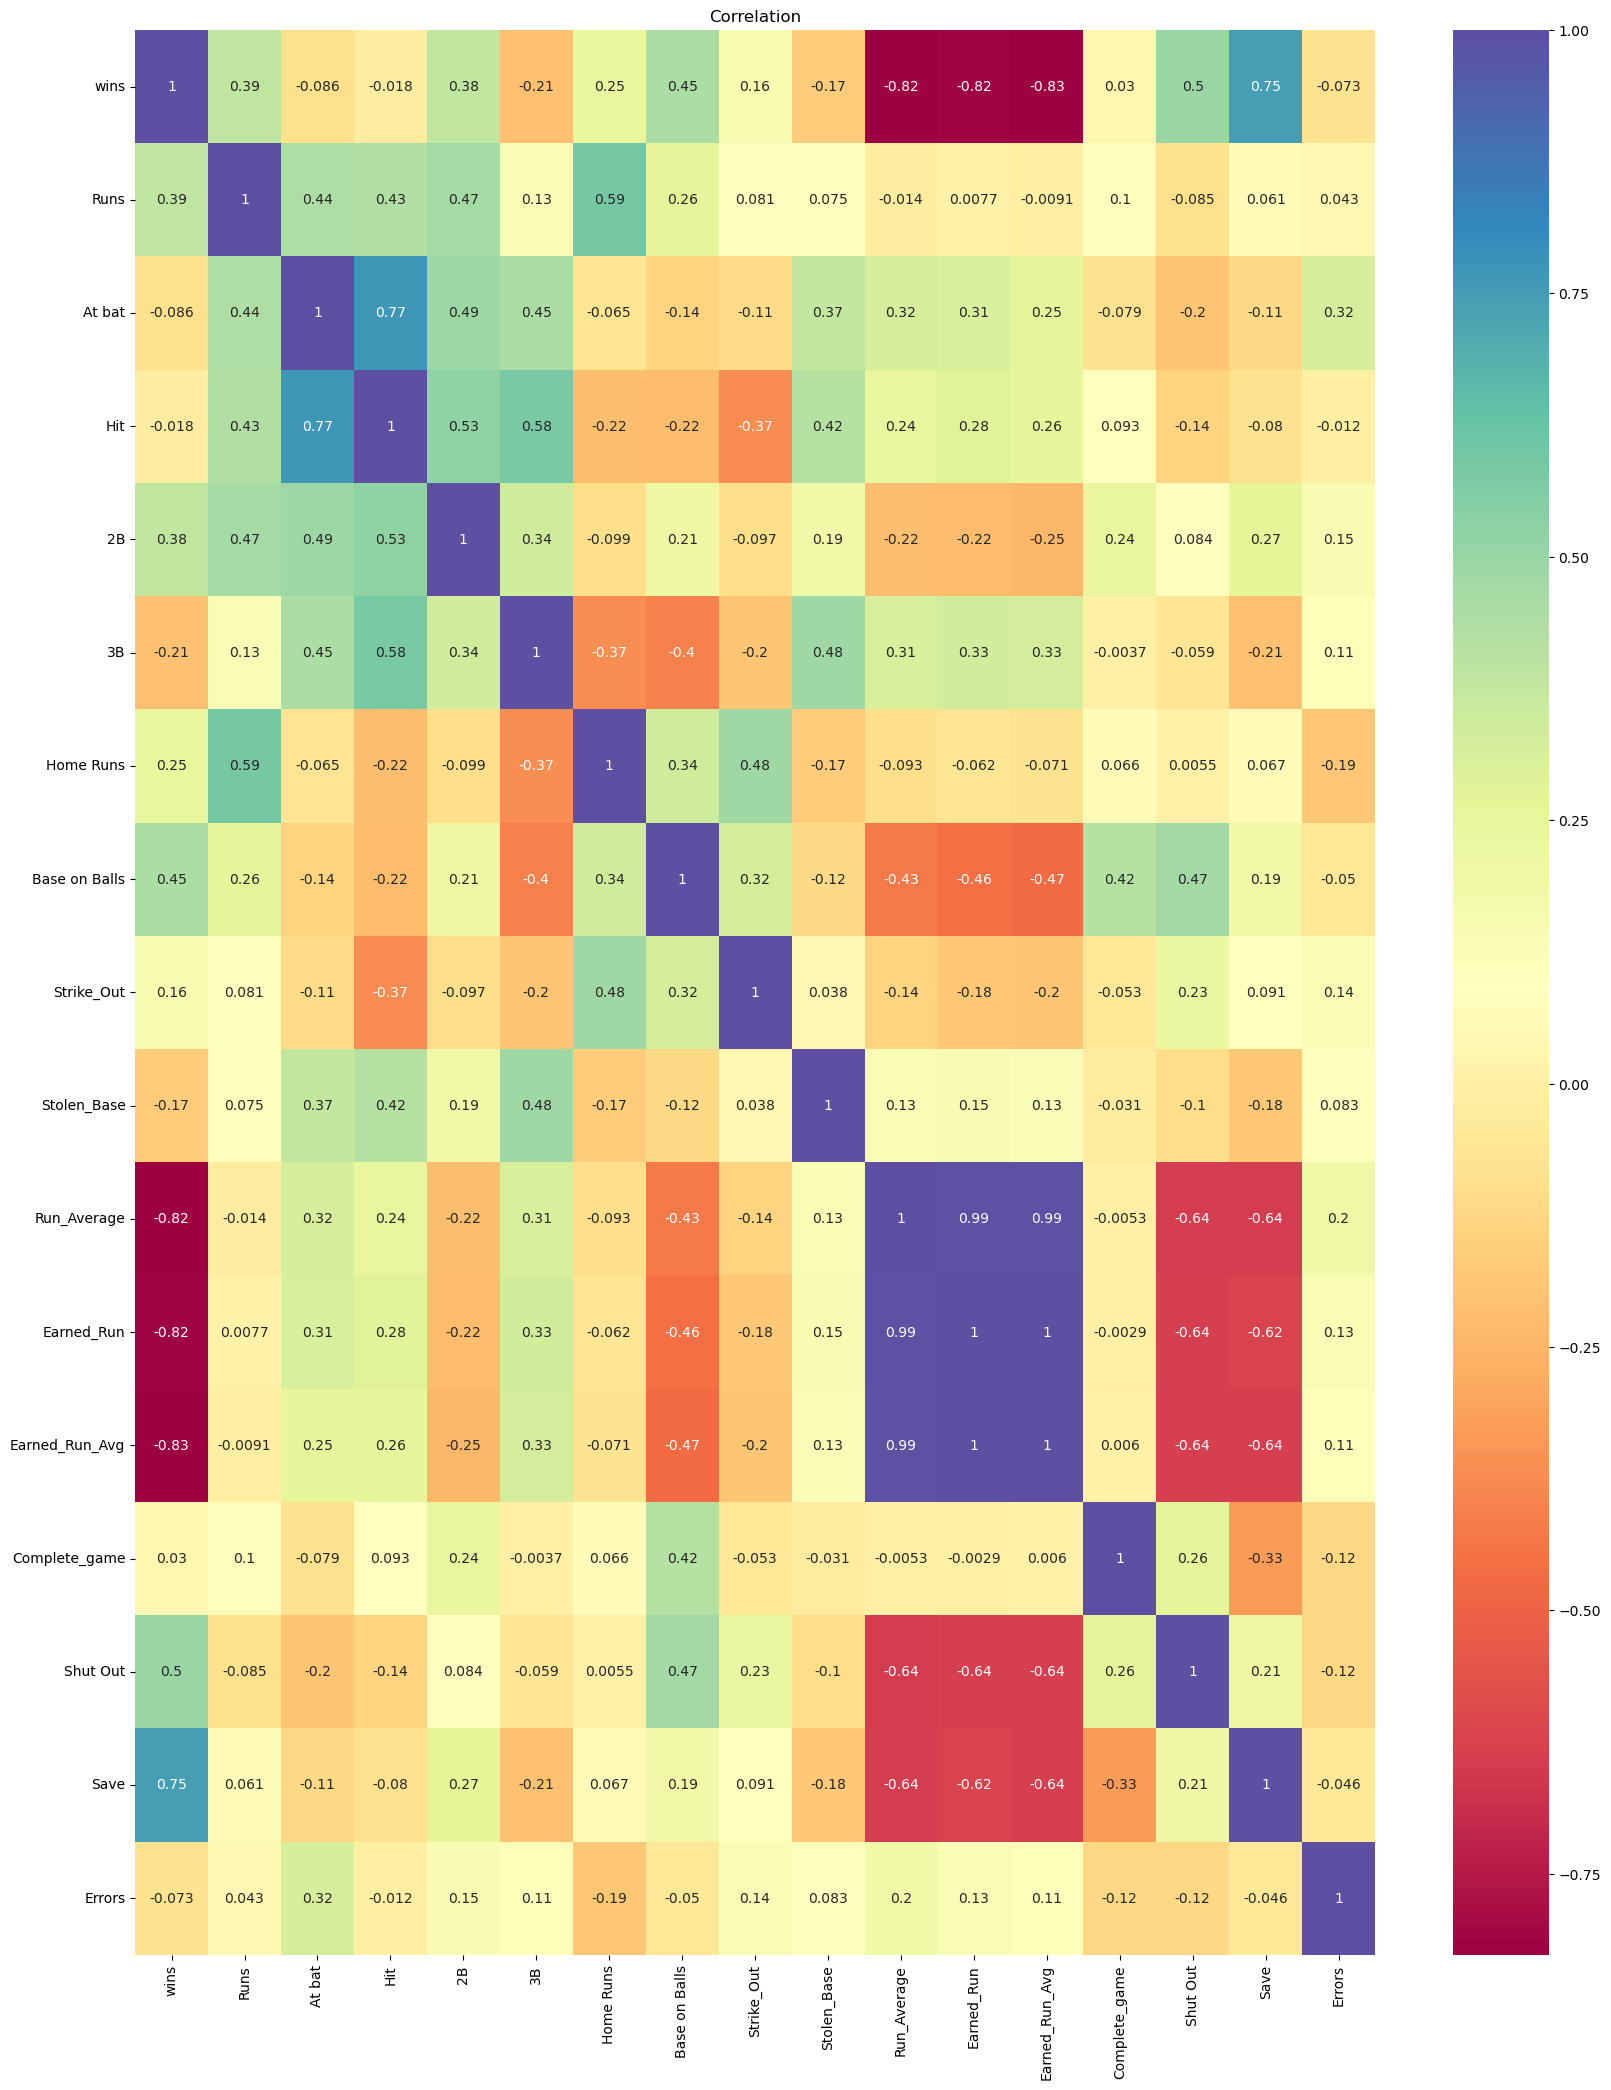

In [36]:
df.corr()
#visulaizing the correlation
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True,cmap='Spectral')
plt.title("Correlation")
plt.show()

In [37]:
df.corr().wins.sort_values()

Earned_Run_Avg   -0.826952
Run_Average      -0.823176
Earned_Run       -0.815308
3B               -0.206737
Stolen_Base      -0.169503
At bat           -0.085780
Errors           -0.072858
Hit              -0.018360
Complete_game     0.029594
Strike_Out        0.156469
Home Runs         0.245697
2B                0.384886
Runs              0.390451
Base on Balls     0.447513
Shut Out          0.497526
Save              0.749290
wins              1.000000
Name: wins, dtype: float64

In [38]:
#Separating feature and target columns
x=df.iloc[:,1:]
x.head()

,Runs,At bat,Hit,2B,3B,Home Runs,Base on Balls,Strike_Out,Stolen_Base,Run_Average,Earned_Run,Earned_Run_Avg,Complete_game,Shut Out,Save,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [39]:
y=df.iloc[:,0]
y.head()

0    95
1    83
2    81
3    76
4    74
Name: wins, dtype: int64

In [40]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
xf=st.fit_transform(x)
xf

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

In [41]:
x=pd.DataFrame(data=xf,columns=x.columns)
x.head()

,Runs,At bat,Hit,2B,3B,Home Runs,Base on Balls,Strike_Out,Stolen_Base,Run_Average,Earned_Run,Earned_Run_Avg,Complete_game,Shut Out,Save,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898


In [42]:
#Checking Multi-Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,7.229564,Runs
1,18.333377,At bat
2,10.558458,Hit
3,3.743423,2B
4,3.278636,3B
5,8.426403,Home Runs
6,3.431971,Base on Balls
7,2.720640,Strike_Out
8,2.110804,Stolen_Base
9,197.315706,Run_Average


We can see there are certain columns having high multi-collinearity, lets remove them for better prediction of our model.

In [43]:
x.drop(['At bat','Run_Average','Earned_Run','Earned_Run_Avg'],axis=1,inplace=True)
x

,Runs,Hit,2B,3B,Home Runs,Base on Balls,Strike_Out,Stolen_Base,Complete_game,Shut Out,Save,Errors
0,0.959398,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.617213,-0.570122,0.211006,1.757915


# Modelling

In [58]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 

In [45]:
#Finding the best random_state
max_acc=0
max_rs=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    rfc=RandomForestRegressor()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=r2_score(y_test,pred)
    if score>max_acc:
        max_acc=score
        max_rs=i
print("Maximum score at",max_rs,"is",max_acc)

Maximum score at 314 is 0.7583557717823974


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=max_rs)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 12)
(9, 12)
(20,)
(9,)


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print("Mean Squared Error=",mean_squared_error(y_test,lr_pred))
print("Mean Absolute Error =",mean_absolute_error(y_test,lr_pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(y_test,lr_pred)))
print("R2 Score =",r2_score(y_test,lr_pred))

Mean Squared Error= 55.56515701991125
Mean Absolute Error = 6.021942977343659
Root Mean Squared Error = 7.454203982982438
R2 Score = 0.5023465591980527


In [49]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
print("Mean Squared Error=",mean_squared_error(y_test,rfr_pred))
print("Mean Absolute Error =",mean_absolute_error(y_test,rfr_pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(y_test,rfr_pred)))
print("R2 Score =",r2_score(y_test,rfr_pred))

Mean Squared Error= 25.504188888888905
Mean Absolute Error = 4.112222222222225
Root Mean Squared Error = 5.050167213953307
R2 Score = 0.7715790247678017


In [50]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
print("Mean Squared Error=",mean_squared_error(y_test,dtr_pred))
print("Mean Absolute Error =",mean_absolute_error(y_test,dtr_pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(y_test,dtr_pred)))
print("R2 Score =",r2_score(y_test,dtr_pred))

Mean Squared Error= 35.111111111111114
Mean Absolute Error = 5.333333333333333
Root Mean Squared Error = 5.92546294487706
R2 Score = 0.6855373728438744


In [51]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr_pred=knr.predict(x_test)
print("Mean Squared Error=",mean_squared_error(y_test,knr_pred))
print("Mean Absolute Error =",mean_absolute_error(y_test,knr_pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(y_test,knr_pred)))
print("R2 Score =",r2_score(y_test,knr_pred))

Mean Squared Error= 42.27111111111108
Mean Absolute Error = 5.8888888888888875
Root Mean Squared Error = 6.501623728816601
R2 Score = 0.6214108801415306


In [52]:
sv=SVR()
sv.fit(x_train,y_train)
sv_pred=sv.predict(x_test)
print("Mean Squared Error=",mean_squared_error(y_test,sv_pred))
print("Mean Absolute Error =",mean_absolute_error(y_test,sv_pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(y_test,sv_pred)))
print("R2 Score =",r2_score(y_test,sv_pred))

Mean Squared Error= 100.82916959136327
Mean Absolute Error = 8.379970969955497
Root Mean Squared Error = 10.041372893751296
R2 Score = 0.09695237318659622


In [59]:
ls=Lasso()
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
print("Mean Squared Error=",mean_squared_error(y_test,ls_pred))
print("Mean Absolute Error =",mean_absolute_error(y_test,ls_pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(y_test,ls_pred)))
print("R2 Score =",r2_score(y_test,ls_pred))

Mean Squared Error= 17.636713131992266
Mean Absolute Error = 3.513094730093504
Root Mean Squared Error = 4.199608687960375
R2 Score = 0.842041821794408


In [60]:
rd=Ridge()
rd.fit(x_train,y_train)
rd_pred=rd.predict(x_test)
print("Mean Squared Error=",mean_squared_error(y_test,rd_pred))
print("Mean Absolute Error =",mean_absolute_error(y_test,rd_pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(y_test,rd_pred)))
print("R2 Score =",r2_score(y_test,rd_pred))

Mean Squared Error= 31.16631008296583
Mean Absolute Error = 4.258359579140797
Root Mean Squared Error = 5.58267947163061
R2 Score = 0.7208678552940919


In [61]:
es=ElasticNet()
es.fit(x_train,y_train)
es_pred=es.predict(x_test)
print("Mean Squared Error=",mean_squared_error(y_test,es_pred))
print("Mean Absolute Error =",mean_absolute_error(y_test,es_pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(y_test,es_pred)))
print("R2 Score =",r2_score(y_test,es_pred))

Mean Squared Error= 31.95033654660612
Mean Absolute Error = 4.543138041574764
Root Mean Squared Error = 5.652462874412014
R2 Score = 0.7138459464534392


# Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
lr_score=cross_val_score(lr,x,y)
print(lr_score)
print(lr_score.mean())
print("Difference between r2_score and cv_score is:",(r2_score(y_test,lr_pred)-lr_score.mean()))

[-0.5666491  -1.82995211  0.51504457  0.72993182  0.65457026]
-0.09941091028113987
Difference between r2_score and cv_score is: 0.6017574694791926


In [64]:
rfr_score=cross_val_score(rfr,x,y)
print(rfr_score)
print(rfr_score.mean())
print("Difference between r2_score and cv_score is:",(r2_score(y_test,rfr_pred)-rfr_score.mean()))

[ 0.23323989 -3.68897763  0.37675299  0.33288197  0.71983461]
-0.40525363535450937
Difference between r2_score and cv_score is: 1.1768326601223111


In [65]:
ls_score=cross_val_score(ls,x,y)
print(ls_score)
print(ls_score.mean())
print("Difference between r2_score and cv_score is:",(r2_score(y_test,ls_pred)-ls_score.mean()))

[ 0.35398095 -2.71816624  0.67379687  0.4674034   0.73205378]
-0.09818624569434112
Difference between r2_score and cv_score is: 0.9402280674887491


# Hyper-Parameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
model=Lasso()
parameters={'alpha':[0,0.1,0.01,0.001,0.0001,1],'max_iter':[500,1500,1300,1250,1400]}
grid=GridSearchCV(estimator=model,param_grid=parameters)
print("GRID :",grid)
grid.fit(x,y)
print("SCORE =",grid.best_score_)
print(grid.best_params_)

GRID : GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 0.0001, 1],
                         'max_iter': [500, 1500, 1300, 1250, 1400]})
SCORE = -0.09818624569434112
{'alpha': 1, 'max_iter': 500}


In [69]:
#Applying the parameters on Lasso
ls=Lasso(alpha=1,max_iter=500)
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
print("R2 score=",r2_score(y_test,ls_pred))

R2 score= 0.842041821794408


In [70]:
final_model=ls
final_model

Lasso(alpha=1, max_iter=500)

# Saving the best model

In [72]:
import joblib
joblib.dump(final_model,"Baseball Case Study.pkl")

['Baseball Case Study.pkl']

In [73]:
#Predicting the saved model
model=joblib.load("Baseball Case Study.pkl")
model.fit(x,y)
prediction=model.predict(x_test)
prediction

array([89.8904673 , 84.67861064, 84.04319499, 72.91840791, 84.30387449,
       82.94380836, 72.76388807, 67.16273292, 90.63654491])

In [74]:
actual=np.array(y_test)
df=pd.DataFrame({"Actual_Value":actual,"Predicted_Value":prediction})
df

,Actual_Value,Predicted_Value
0,92,89.890467
1,87,84.678611
2,79,84.043195
3,68,72.918408
4,84,84.303874
5,83,82.943808
6,74,72.763888
7,63,67.162733
8,98,90.636545
